<a href="https://colab.research.google.com/github/nkcong206/traffic_signs_classification/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
pwd

'/content'

In [2]:
cd /content/drive/MyDrive/bien_so_xe

/content/drive/MyDrive/bien_so_xe


In [ ]:
link  = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [3]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=6d5338586c9c2e8e1c2a6e4ec552c6ce5e0f9870a5053eb6b7bbdba3924e3d36
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data.zip'

In [5]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

In [6]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [7]:
import pickle

In [8]:
with open(train_link,mode ="rb") as f:
    train = pickle.load(f)

In [9]:
with open(valid_link,mode ="rb") as f:
    valid = pickle.load(f)

In [10]:
with open(test_link,mode ="rb") as f:
    test = pickle.load(f)

In [11]:
train


{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [12]:
trainX = train["features"]
trainY = train["labels"]

In [13]:
trainX.shape

(34799, 32, 32, 3)

In [14]:
trainX[0].shape

(32, 32, 3)

In [15]:
import matplotlib.pyplot as plt


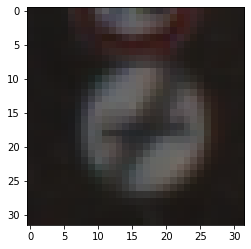

In [16]:
plt.imshow(trainX[0])

In [17]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [20]:
trainY[0]

41

In [21]:
classNames[trainY[0]]

'End of no passing'

In [22]:
from sklearn.utils import shuffle

In [23]:
trainX, trainY = shuffle(trainX, trainY)

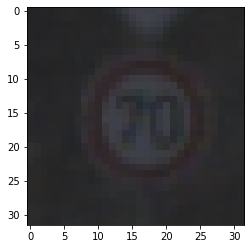

In [25]:
plt.imshow(trainX[0])

In [26]:
classNames[trainY[0]]

'Speed limit (70km/h)'

In [28]:
validX = valid["features"]
validY = valid["labels"]

In [29]:
testX = test["features"]
testY = test["labels"]

In [30]:
trainX = trainX.astype("float")/255.0

In [31]:
validX = validX.astype("float")/255.0

In [32]:
testX = testX.astype("float")/255.0

In [33]:
from sklearn.preprocessing import LabelBinarizer

In [34]:
lb = LabelBinarizer()

In [35]:
trainY = lb.fit_transform(trainY)

In [36]:
validY = lb.fit_transform(validY)

In [37]:
testY = lb.fit_transform(testY)

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [40]:
model = Sequential()

In [41]:
width = 32
height = 32
classes = 43

In [42]:
shape = (width, height, 3)

In [45]:
model.add(Conv2D(32,(3,3), padding = "same", input_shape=shape))

In [47]:
model.add(Activation("relu"))

In [50]:
model.add(BatchNormalization())

In [52]:
model.add(Conv2D(32,(3,3), padding = "same"))

In [53]:
model.add(Activation("relu"))

In [54]:
model.add(BatchNormalization())

In [56]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [58]:
model.add(Conv2D(64,(3,3), padding = "same"))

In [59]:
model.add(Activation("relu"))

In [60]:
model.add(BatchNormalization())

In [61]:
model.add(Conv2D(64,(3,3), padding = "same"))

In [62]:
model.add(Activation("relu"))

In [63]:
model.add(BatchNormalization())

In [64]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [66]:
model.add(Flatten())

In [68]:
model.add(Dense(512))

In [69]:
model.add(Activation("relu"))

In [70]:
model.add(BatchNormalization())

In [71]:
model.add(Dense(classes))

In [72]:
model.add(Activation("softmax"))

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [76]:
aug = ImageDataGenerator(rotation_range= 0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [77]:
learning_rate = 0.01

In [85]:
epochs = 10
# epoch
# Steps

batch_size = 64

In [78]:
opt = SGD(learning_rate=learning_rate,momentum=0.9)

In [79]:
model.compile(optimizer=opt, loss= "categorical_crossentropy", metrics=["accuracy"])

In [87]:
print("start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), 
                        steps_per_epoch=trainX.shape[0] // batch_size, epochs=epochs, verbose=1)

start training


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
543/543 [==============================] - 225s 412ms/step - loss: 1.9140 - accuracy: 0.4483 - val_loss: 1.8214 - val_accuracy: 0.4889
Epoch 2/10
543/543 [==============================] - 218s 402ms/step - loss: 0.7388 - accuracy: 0.7600 - val_loss: 1.4109 - val_accuracy: 0.6274
Epoch 3/10
543/543 [==============================] - 219s 404ms/step - loss: 0.3713 - accuracy: 0.8801 - val_loss: 0.7986 - val_accuracy: 0.7596
Epoch 4/10
543/543 [==============================] - 218s 401ms/step - loss: 0.2352 - accuracy: 0.9230 - val_loss: 0.7814 - val_accuracy: 0.7766
Epoch 5/10
543/543 [==============================] - 217s 400ms/step - loss: 0.1572 - accuracy: 0.9485 - val_loss: 0.5753 - val_accuracy: 0.8515
Epoch 6/10
543/543 [==============================] - 217s 400ms/step - loss: 0.1164 - accuracy: 0.9647 - val_loss: 0.7333 - val_accuracy: 0.8200
Epoch 7/10
543/543 [==============================] - 218s 401ms/step - loss: 0.1016 - accuracy: 0.9661 - val_loss: 0.7408 -

In [88]:
model.save("traffic_signs.h5")

In [90]:
saved_model = tf.keras.models.load_model("traffic_signs.h5")

In [109]:
result = saved_model.predict(testX[200:201])

In [102]:
result

array([[3.01478747e-02, 9.61533785e-01, 1.69647552e-04, 3.87796763e-06,
        3.39646870e-03, 2.81056646e-06, 1.89908189e-06, 1.95949062e-04,
        2.00745519e-04, 4.95683253e-06, 2.53840299e-05, 8.62263478e-05,
        2.08459314e-05, 3.77960419e-06, 2.95281297e-05, 1.28748798e-06,
        3.63372806e-06, 2.91537253e-06, 6.57579862e-04, 5.20710346e-05,
        2.88812294e-06, 4.25876315e-05, 7.70105430e-07, 8.44177703e-06,
        1.81090127e-05, 9.57139942e-04, 3.94215785e-05, 1.20050812e-04,
        1.88818794e-05, 1.08897694e-07, 1.72987693e-05, 5.73080570e-06,
        7.97824305e-06, 3.47927858e-06, 5.03185311e-06, 3.54597178e-05,
        2.01854346e-06, 3.82039325e-05, 2.03314866e-03, 3.76001590e-05,
        2.16365388e-05, 3.99943674e-05, 2.96091866e-06]], dtype=float32)

In [103]:
import numpy as np

In [110]:
final = np.argmax(result)

In [111]:
final = classNames[final]

In [112]:
final 

'No entry'

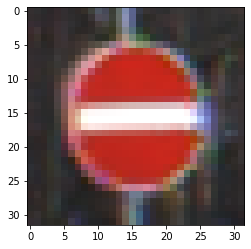

In [114]:
plt.imshow(test["features"][200])